# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

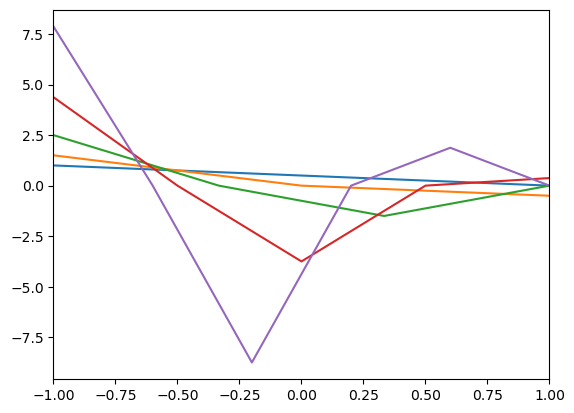

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

fig, ax = plt.subplots()
for i in range(1,6):
    x = np.linspace(-1, 1, i + 1)
    y = sps.legendre(i)
    ax.plot(x, y)
    ax.set_xlim(-1, 1)

2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
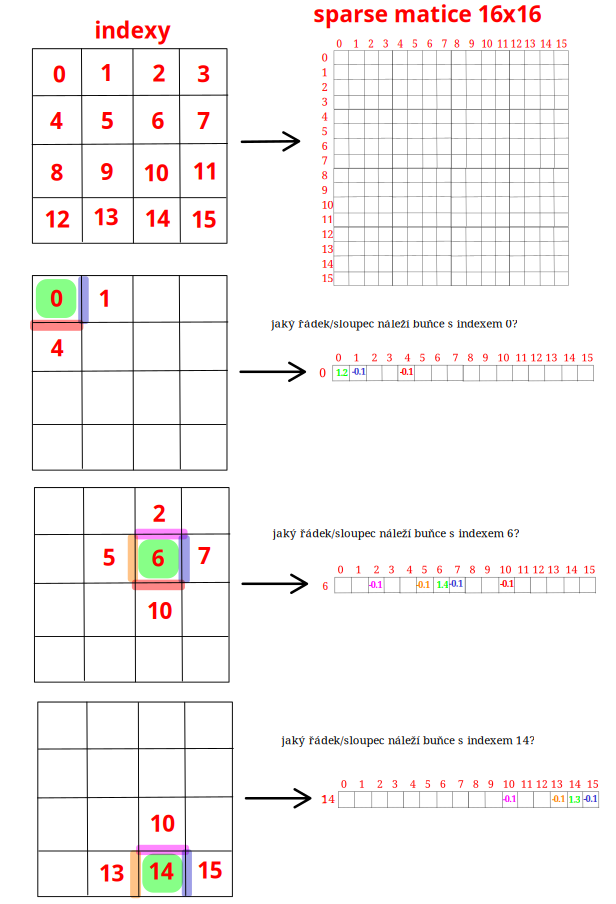


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


In [2]:
import scipy.sparse as sparse
n = 12
epsilon = 1e-1
A = sparse.lil_matrix((n**2, n**2))

for i in range(n):
    for j in range(n):
        k = 4
        if(i == 0 or i == n - 1):
            k-= 1
        if(j == 0 or j == n - 1):
            k-= 1

        A[i * n + j, i * n + j] = 1 + k * epsilon

        if(i != 0):
            A[i * n + j, (i - 1)*n + j] -= epsilon
        if(i != n - 1):
            A[i * n + j, (i + 1)*n + j]-= epsilon
        if(j != 0):
            A[i * n + j, i*n+j - 1]-= epsilon
        if(j != n - 1):
            A[i * n + j, i*n+j + 1]-= epsilon


print(A.todense())

[[ 1.2 -0.1  0.  ...  0.   0.   0. ]
 [-0.1  1.3 -0.1 ...  0.   0.   0. ]
 [ 0.  -0.1  1.3 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.3 -0.1  0. ]
 [ 0.   0.   0.  ... -0.1  1.3 -0.1]
 [ 0.   0.   0.  ...  0.  -0.1  1.2]]


3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [3]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    horizontal_up_idx = np.linspace(0, n**2 - n - 1, n**2 - n, dtype=int)
    horizontal_low_idx = np.linspace(n, n**2 - 1, n**2 - n, dtype=int)
    row_horizontal = np.hstack((horizontal_up_idx, horizontal_low_idx))
    col_horizontal = np.hstack((horizontal_low_idx, horizontal_up_idx))
    data_horizontal = -epsilon * np.ones(2 * (n * n - n))


    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten()
    vertical_left_idx = index_matrix_vertical[0 : n**2 - n]
    vertical_right_idx = index_matrix_vertical[n : n**2]
    row_vertical = np.hstack((vertical_left_idx, vertical_right_idx))
    col_vertical = np.hstack((vertical_right_idx, vertical_left_idx))
    data_vertical = -epsilon * np.ones(2 * (n * n - n))


    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    data_diag[0 : n] -= epsilon
    data_diag[n**2 - n : n**2] -= epsilon
    data_diag[0 : n**2 : n] -= epsilon
    data_diag[n-1 : n**2 : n] -= epsilon

    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    A_efficiently = csr_matrix((data,(row,col)))

    return A_efficiently

print(A_efficiently(n, epsilon).todense())


[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

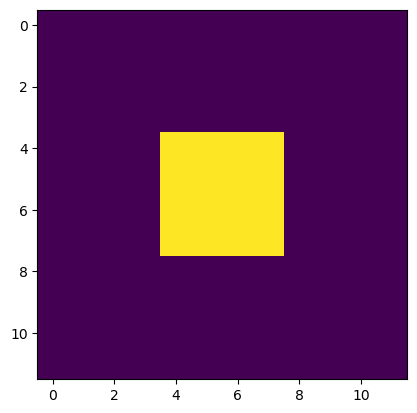

In [4]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

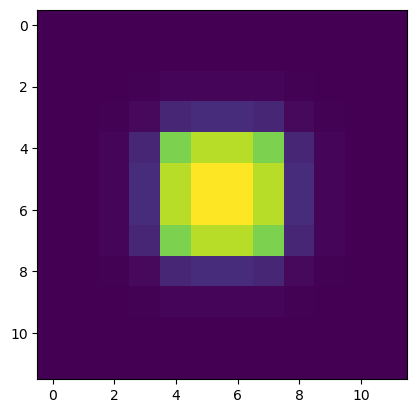

In [5]:
import scipy as sp
import numpy as np

x = sp.linalg.solve(A.todense(), b)
plt.imshow(x.reshape((n, n)))


[2.57274066 2.49282032 1.        ]


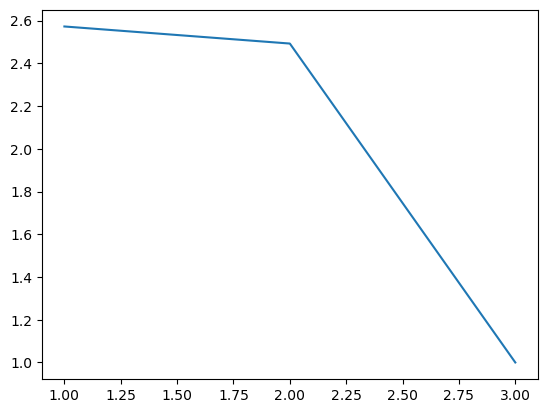

In [6]:
eigenvals = sp.linalg.eigvals(A.todense())
eigenvals = eigenvals.real[0:3]
print(eigenvals)
plt.plot([1,2,3], eigenvals.real[0:3])
plt.show()

5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

In [7]:
import numpy as np

MyLegendre_5 = np.polynomial.legendre.Legendre([0, 0, 0, 0, 0, 1])
roots = MyLegendre_5.roots()
for i in range(5):
    if(roots[i] < -1 or roots[i] > 1):
        roots.remove(i)

print(roots)


[-9.06179846e-01 -5.38469310e-01 -2.88799790e-17  5.38469310e-01
  9.06179846e-01]


6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [8]:
import sympy as sp
import math

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
sp.pprint(legendre_5)
legendre_5 = sp.solve(legendre_5)
print(legendre_5)


    5       3       
63⋅x    35⋅x    15⋅x
───── - ───── + ────
  8       4      8  
[0, -sqrt(5/9 - 2*sqrt(70)/63), sqrt(5/9 - 2*sqrt(70)/63), -sqrt(2*sqrt(70)/63 + 5/9), sqrt(2*sqrt(70)/63 + 5/9)]


In [9]:
for i in range(5):
    legendre_5[i] = legendre_5[i].evalf()

legendre_5 = np.array(legendre_5)
print(roots - np.sort(legendre_5))

[-7.77156117237610e-16 4.44089209850063e-16 -2.88799789923631e-17
 2.22044604925031e-16 6.66133814775094e-16]
